## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  46.789211  1536.501098  0.898387   4.512615  1381.205589
1  91.582252   923.342977  0.287476  10.494843   280.889231
2  73.796651   766.517215  0.300971   1.587719   242.271898
3  80.626008   887.919163  0.875551   1.388939   781.473335
4  32.844657   518.585302  0.904289   3.338263   470.034454


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9876145	total: 57.7ms	remaining: 57.7s
1:	learn: 0.9747235	total: 58.2ms	remaining: 29.1s
2:	learn: 0.9661058	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9552905	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9436357	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9316875	total: 60.4ms	remaining: 10s
6:	learn: 0.9203884	total: 60.9ms	remaining: 8.63s
7:	learn: 0.9080210	total: 61.4ms	remaining: 7.61s
8:	learn: 0.8952715	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8833487	total: 62.3ms	remaining: 6.17s
10:	learn: 0.8718757	total: 62.7ms	remaining: 5.64s
11:	learn: 0.8584494	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8472684	total: 63.7ms	remaining: 4.84s
13:	learn: 0.8357653	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8241865	total: 64.6ms	remaining: 4.24s
15:	learn: 0.8151499	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8039491	total: 65.7ms	remaining: 3.8s
17:	learn: 0.7931388	total: 66.1ms	remaining: 3.61s
18:	learn: 0.7863741	total: 66.5ms	remaining: 3

85:	learn: 0.3442932	total: 104ms	remaining: 1.11s
86:	learn: 0.3404330	total: 105ms	remaining: 1.1s
87:	learn: 0.3372747	total: 105ms	remaining: 1.09s
88:	learn: 0.3336296	total: 106ms	remaining: 1.08s
89:	learn: 0.3302315	total: 107ms	remaining: 1.08s
90:	learn: 0.3271040	total: 107ms	remaining: 1.07s
91:	learn: 0.3244751	total: 108ms	remaining: 1.06s
92:	learn: 0.3206334	total: 108ms	remaining: 1.05s
93:	learn: 0.3173019	total: 108ms	remaining: 1.04s
94:	learn: 0.3134298	total: 109ms	remaining: 1.04s
95:	learn: 0.3100674	total: 109ms	remaining: 1.03s
96:	learn: 0.3064171	total: 110ms	remaining: 1.02s
97:	learn: 0.3029419	total: 110ms	remaining: 1.02s
98:	learn: 0.2997973	total: 111ms	remaining: 1.01s
99:	learn: 0.2956829	total: 111ms	remaining: 1s
100:	learn: 0.2916021	total: 112ms	remaining: 996ms
101:	learn: 0.2881562	total: 112ms	remaining: 988ms
102:	learn: 0.2851153	total: 113ms	remaining: 981ms
103:	learn: 0.2819749	total: 113ms	remaining: 974ms
104:	learn: 0.2791032	total: 11

266:	learn: 0.0635746	total: 186ms	remaining: 512ms
267:	learn: 0.0630575	total: 187ms	remaining: 511ms
268:	learn: 0.0625877	total: 188ms	remaining: 510ms
269:	learn: 0.0620535	total: 188ms	remaining: 508ms
270:	learn: 0.0615407	total: 188ms	remaining: 507ms
271:	learn: 0.0610883	total: 189ms	remaining: 505ms
272:	learn: 0.0606591	total: 189ms	remaining: 503ms
273:	learn: 0.0602190	total: 189ms	remaining: 502ms
274:	learn: 0.0597513	total: 190ms	remaining: 500ms
275:	learn: 0.0593382	total: 190ms	remaining: 499ms
276:	learn: 0.0589213	total: 191ms	remaining: 498ms
277:	learn: 0.0584820	total: 191ms	remaining: 497ms
278:	learn: 0.0580734	total: 192ms	remaining: 495ms
279:	learn: 0.0576753	total: 192ms	remaining: 494ms
280:	learn: 0.0573035	total: 192ms	remaining: 492ms
281:	learn: 0.0569306	total: 193ms	remaining: 491ms
282:	learn: 0.0565704	total: 193ms	remaining: 490ms
283:	learn: 0.0561737	total: 194ms	remaining: 488ms
284:	learn: 0.0557993	total: 194ms	remaining: 487ms
285:	learn: 

513:	learn: 0.0198717	total: 287ms	remaining: 271ms
514:	learn: 0.0197958	total: 287ms	remaining: 270ms
515:	learn: 0.0197059	total: 288ms	remaining: 270ms
516:	learn: 0.0196674	total: 288ms	remaining: 269ms
517:	learn: 0.0196104	total: 288ms	remaining: 268ms
518:	learn: 0.0195209	total: 289ms	remaining: 267ms
519:	learn: 0.0194422	total: 289ms	remaining: 267ms
520:	learn: 0.0193714	total: 290ms	remaining: 266ms
521:	learn: 0.0193050	total: 290ms	remaining: 266ms
522:	learn: 0.0192685	total: 291ms	remaining: 265ms
523:	learn: 0.0191828	total: 291ms	remaining: 264ms
524:	learn: 0.0190984	total: 291ms	remaining: 264ms
525:	learn: 0.0190116	total: 292ms	remaining: 263ms
526:	learn: 0.0189272	total: 292ms	remaining: 263ms
527:	learn: 0.0188938	total: 293ms	remaining: 262ms
528:	learn: 0.0188118	total: 293ms	remaining: 261ms
529:	learn: 0.0187502	total: 294ms	remaining: 261ms
530:	learn: 0.0186863	total: 294ms	remaining: 260ms
531:	learn: 0.0186022	total: 295ms	remaining: 259ms
532:	learn: 

699:	learn: 0.0113303	total: 368ms	remaining: 158ms
700:	learn: 0.0112875	total: 368ms	remaining: 157ms
701:	learn: 0.0112577	total: 369ms	remaining: 157ms
702:	learn: 0.0112155	total: 369ms	remaining: 156ms
703:	learn: 0.0111985	total: 370ms	remaining: 155ms
704:	learn: 0.0111818	total: 370ms	remaining: 155ms
705:	learn: 0.0111480	total: 371ms	remaining: 154ms
706:	learn: 0.0111392	total: 371ms	remaining: 154ms
707:	learn: 0.0110979	total: 371ms	remaining: 153ms
708:	learn: 0.0110690	total: 372ms	remaining: 152ms
709:	learn: 0.0110283	total: 372ms	remaining: 152ms
710:	learn: 0.0110122	total: 372ms	remaining: 151ms
711:	learn: 0.0109819	total: 372ms	remaining: 151ms
712:	learn: 0.0109540	total: 373ms	remaining: 150ms
713:	learn: 0.0109194	total: 373ms	remaining: 149ms
714:	learn: 0.0109041	total: 373ms	remaining: 149ms
715:	learn: 0.0108650	total: 374ms	remaining: 148ms
716:	learn: 0.0108312	total: 374ms	remaining: 148ms
717:	learn: 0.0107985	total: 374ms	remaining: 147ms
718:	learn: 

927:	learn: 0.0055821	total: 468ms	remaining: 36.3ms
928:	learn: 0.0055721	total: 468ms	remaining: 35.8ms
929:	learn: 0.0055514	total: 469ms	remaining: 35.3ms
930:	learn: 0.0055223	total: 469ms	remaining: 34.8ms
931:	learn: 0.0054959	total: 469ms	remaining: 34.2ms
932:	learn: 0.0054738	total: 470ms	remaining: 33.7ms
933:	learn: 0.0054553	total: 470ms	remaining: 33.2ms
934:	learn: 0.0054455	total: 470ms	remaining: 32.7ms
935:	learn: 0.0054173	total: 471ms	remaining: 32.2ms
936:	learn: 0.0053959	total: 471ms	remaining: 31.7ms
937:	learn: 0.0053736	total: 472ms	remaining: 31.2ms
938:	learn: 0.0053558	total: 472ms	remaining: 30.7ms
939:	learn: 0.0053340	total: 473ms	remaining: 30.2ms
940:	learn: 0.0053243	total: 473ms	remaining: 29.7ms
941:	learn: 0.0053070	total: 473ms	remaining: 29.1ms
942:	learn: 0.0052829	total: 474ms	remaining: 28.6ms
943:	learn: 0.0052662	total: 474ms	remaining: 28.1ms
944:	learn: 0.0052451	total: 475ms	remaining: 27.6ms
945:	learn: 0.0052353	total: 475ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

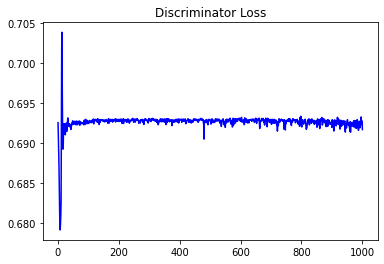

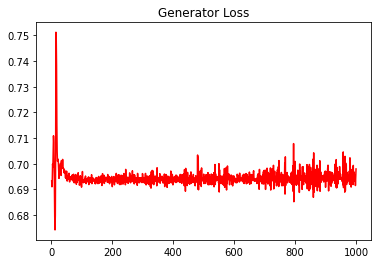

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.011758403790123047


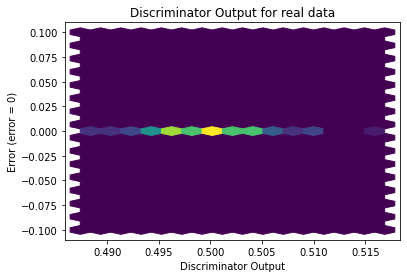

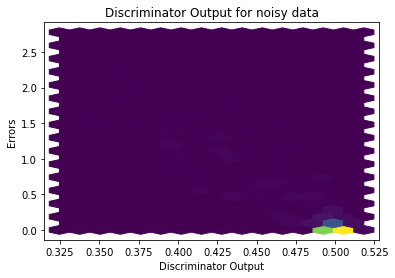

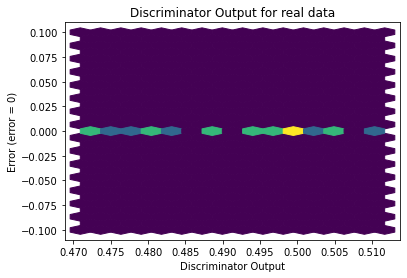

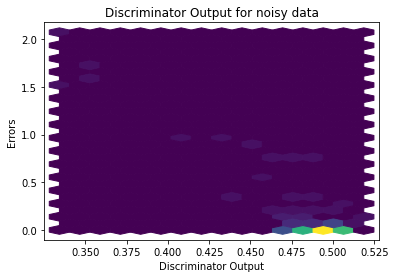

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


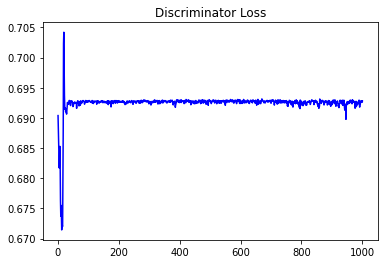

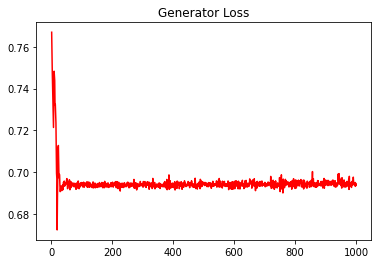

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.00755978295986441


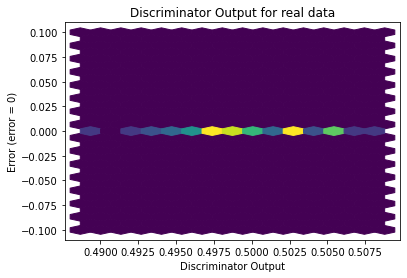

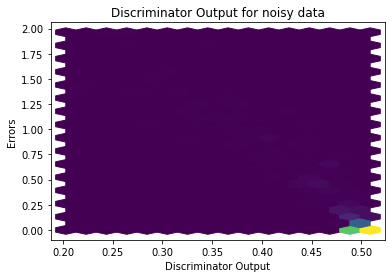

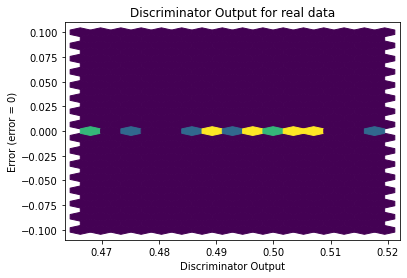

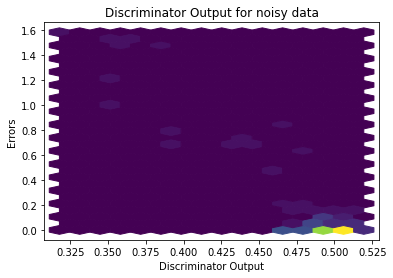

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8791]], requires_grad=True)
